In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['axes.titlepad'] = 20

In [3]:
#Read in two files
gil_info = pd.read_csv("gil_info_update.csv")
gil_scr = pd.read_csv("Gillam_scripts.csv")
#gil_info = gil_info.drop("Unnamed: 0", axis = 1)
pd.DataFrame.head(gil_info)

,Unnamed: 0,transcript_id,date,Impaired,Age,Gender
0,273,9846,11/28/2001,0,5,f
1,274,9847,11/28/2001,0,5,f
2,275,9848,11/15/2001,0,5,f
3,276,9849,11/15/2001,0,5,f
4,277,9850,12/5/2001,0,5,f


In [4]:
#Combine two data files to one named gil_info
nrow_scr = len(gil_scr["id"])
nrow_info = len(gil_info["transcript_id"])
gil_info["Gloss"] = [[] for x in range(nrow_info)]
gil_info["POS"] = [[] for x in range(nrow_info)]


for i in range(nrow_scr):
    tran_id = gil_scr["transcript_id"][i]
    idx = list(gil_info["transcript_id"]).index(int(tran_id))
    gil_info["Gloss"][idx].append(gil_scr["gloss"][i])
    gil_info["POS"][idx].append(gil_scr["part_of_speech"][i])

In [5]:
pd.DataFrame.head(gil_info)

,Unnamed: 0,transcript_id,date,Impaired,Age,Gender,Gloss,POS
0,273,9846,11/28/2001,0,5,f,[the girl couldn't couldn't decide what to hav...,"[det:art n mod v pro:int inf v, nan, n:prop, p..."
1,274,9847,11/28/2001,0,5,f,"[one day, eighteen one day, um they went to Mc...","[det:num n, det:num det:num n, pro:sub v prep ..."
2,275,9848,11/15/2001,0,5,f,"[they didn't get to eat their food, hm, I don'...","[pro:sub mod v inf v det:poss n, co, nan, nan,..."
3,276,9849,11/15/2001,0,5,f,"[one time there was a little girl and boy, and...","[det:num n adv cop det:art adj n coord n, coor..."
4,277,9850,12/5/2001,0,5,f,[um they couldn't get their food because their...,[pro:sub mod v det:poss n conj det:poss n v de...


In [6]:
# Create POS vocabulary dictionary
import itertools

def split_example(pos_example):
    str_lst = []
    for sent in pos_example:
        sent2str = str(sent).split()
        str_lst.append(sent2str)
    str_lst = list(itertools.chain.from_iterable(str_lst))
    return str_lst


pos_vocab = []
for i in range(len(gil_info["POS"])):
    str_lst = split_example(gil_info["POS"][i])
    for string in str_lst:
        if not string in pos_vocab:
            pos_vocab.append(string)
            
def find_pos_freq(pos_example):
    """
    A function that find that gives a dictionary of the POS frequency of each row
    """
    pos_dict = {key: 0 for key in pos_vocab}
    for sent in pos_example:
        sent2str = str(sent).split()
        for string in sent2str:
            pos_dict[string] += 1
    return pos_dict

pos_dict_df = {}
for i in range(len(gil_info["POS"])):
    pos_dict_df[gil_info["transcript_id"][i]] = find_pos_freq(gil_info["POS"][i])

# Analysis 1: Noun-Verb

In [13]:
# Create a dictionary of noun & verb frequencies 
nv_freq = {key : {
    "Noun" : None, 
    "Verb" : None,
    "NtoV"  : None,
    "NVtoTot" : None
} for key in pos_dict_df.keys()}

for idx in pos_dict_df:
    dic = pos_dict_df[idx]
    values = dic.values()
    total_freq = sum(values)
    nv_freq[idx]["Noun"] = float((dic['n'] + dic['n:pt'] + dic['n:prop'] + dic['n:gerund']))/total_freq
    nv_freq[idx]["Verb"] = float(dic['v'])/total_freq
    nv_freq[idx]["NtoV"]  = nv_freq[idx]["Noun"]/nv_freq[idx]["Verb"]
    nv_freq[idx]["NVtoTot"] = float(nv_freq[idx]["Noun"]+nv_freq[idx]["Verb"])/total_freq

In [8]:
nv_df = pd.DataFrame(nv_freq).T
gil_info = gil_info.sort_values(by = ["transcript_id"])
nv_df.reset_index(drop=True, inplace=True)
gil_info.reset_index(drop=True, inplace=True)
nv_data = pd.concat([gil_info,nv_df], axis = 1)

# Processed data with Noun-Verb frequencies
nv_data

,Unnamed: 0,transcript_id,date,Impaired,Age,Gender,Gloss,POS,NVtoTot,Noun,NtoV,Verb
0,0,9573,1/28/2002,1,10,f,"[and she asked um where do you wanna go, and t...","[coord pro:sub v adv:int mod pro:per v v, coor...",0.001060,0.161184,1.000000,0.161184
1,1,9574,12/2/2002,1,10,f,"[um they were hungry, um mom says where do you...","[pro:sub cop adj, n v adv:int mod pro:per v in...",0.001283,0.189091,1.155556,0.163636
2,2,9575,11/14/2002,1,10,f,[Lisa and Raymond and their mother were suppos...,[n:prop coord n:prop coord det:poss n aux part...,0.001196,0.202055,1.372093,0.147260
3,3,9576,12/3/2002,1,10,f,"[their mom said we'll go to Mcdonalds, and the...","[det:poss n v pro:sub v prep n:prop, coord pro...",0.003665,0.180556,2.166667,0.083333
4,4,9577,11/5/2002,1,10,f,"[um the boy and the girl ordered um, they went...","[det:art n coord det:art n v, pro:sub v prep n...",0.000994,0.147601,1.212121,0.121771
5,5,9578,12/2/2002,1,10,f,[Molly s couldn't make up her mind w with what...,[n:prop mod v prep det:poss n prep pro:int pro...,0.000835,0.192593,1.322034,0.145679
6,6,9579,11/12/2002,1,10,f,[when when they both got back from home their ...,[conj pro:sub post v adv prep n det:poss n v p...,0.001193,0.151899,1.161290,0.130802
7,7,9580,11/1/2002,1,10,f,[the girl wa Lisa wanted a happymeal a ice+cre...,"[n:prop v det:art det:art n, coord det:art n p...",0.001523,0.150000,1.600000,0.093750
8,8,9581,3/20/2002,1,10,m,[alright xxx have to alright when the kids got...,"[conj det:art n v adv det:art n v co v, pro:su...",0.000655,0.184369,1.295775,0.142285
9,9,9582,4/12/2002,1,10,m,[hm I guess it was one tuesday I guess that's ...,[co pro:sub v pro:per cop det:num n pro:sub n ...,0.001267,0.187023,1.289474,0.145038


## Age~Noun & Verb frequencies

In [86]:
# Create Dataframe
age_lst = nv_data["Age"].unique()
age_lst = list(age_lst)
age_lst.sort()
agenv_df = {
    "Age" : age_lst, 
    "Noun": [np.mean(nv_data[nv_data["Age"]==age]["Noun"]) for age in age_lst],
    "Verb": [np.mean(nv_data[nv_data["Age"]==age]["Verb"]) for age in age_lst],
    "NtoV" : [np.mean(nv_data[nv_data["Age"]==age]["NtoV"]) for age in age_lst],
    "NVtoTot" : [np.mean(nv_data[nv_data["Age"]==age]["NVtoTot"]) for age in age_lst]
}

In [102]:
# OLS Regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Model summary
nv_lm = ols('Age ~ Noun * Verb', data=nv_data).fit()
table = sm.stats.anova_lm(nv_lm, typ=2) # Type 2 ANOVA DataFrame
print(nv_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.295
Date:                Sun, 02 Jun 2019   Prob (F-statistic):             0.0767
Time:                        20:28:20   Log-Likelihood:                -1303.5
No. Observations:                 668   AIC:                             2615.
Df Residuals:                     664   BIC:                             2633.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0123      1.800      6.674      0.0

In [103]:
# Model summary
nvratio_lm = ols('Age ~ NtoV', data=nv_data).fit()
table = sm.stats.anova_lm(nvratio_lm, typ=2) # Type 2 ANOVA DataFrame
print(nvratio_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.961
Date:                Sun, 02 Jun 2019   Prob (F-statistic):             0.0858
Time:                        20:28:20   Log-Likelihood:                -1305.4
No. Observations:                 668   AIC:                             2615.
Df Residuals:                     666   BIC:                             2624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9404      0.169     46.884      0.0

In [12]:
# Model summary
import statsmodels.api as sm
from statsmodels.formula.api import ols

nvtotot_lm = ols('Age ~ NVtoTot', data=nv_data).fit()
table = sm.stats.anova_lm(nvtotot_lm, typ=2) # Type 2 ANOVA DataFrame
print(nvtotot_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     107.1
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.25e-23
Time:                        15:08:49   Log-Likelihood:                -1257.1
No. Observations:                 668   AIC:                             2518.
Df Residuals:                     666   BIC:                             2527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4217      0.095     88.596      0.0

* Nouns and verbs are used less frequently as a child gets older. --> Partially because children use more complex structures as they grow older.
* N:V ratio insignificant --> These children are already old enough, this is not the earliest stage of language learning. 

## Age~Noun Verb Frequencies - Separately analyze LanguageImpair

In [71]:
Impaired = nv_data[nv_data["Impaired"]==1]
Normal = nv_data[nv_data["Impaired"]==0]

from scipy import stats as sts

NtoV_t = sts.ttest_ind(Impaired["NtoV"], Normal['NtoV'], equal_var = False)

print("Test Statistics", "p-value")
print(NtoV_t[0], NtoV_t[1])

('Test Statistics', 'p-value')
(0.334674184301455, 0.73808248432502)


* Insignificant t-test comparing N:V ratios between impaired and normal.

In [72]:
NVtoTot_t = sts.ttest_ind(Impaired["NVtoTot"], Normal['NVtoTot'], equal_var = False)

print("Test Statistics", "p-value")
print(NVtoTot_t[0], NVtoTot_t[1])

('Test Statistics', 'p-value')
(5.183921088116906, 4.43015573745783e-07)


Text(0.5,1,'Noun and Verb Use in Total POS Tags Across Ages')

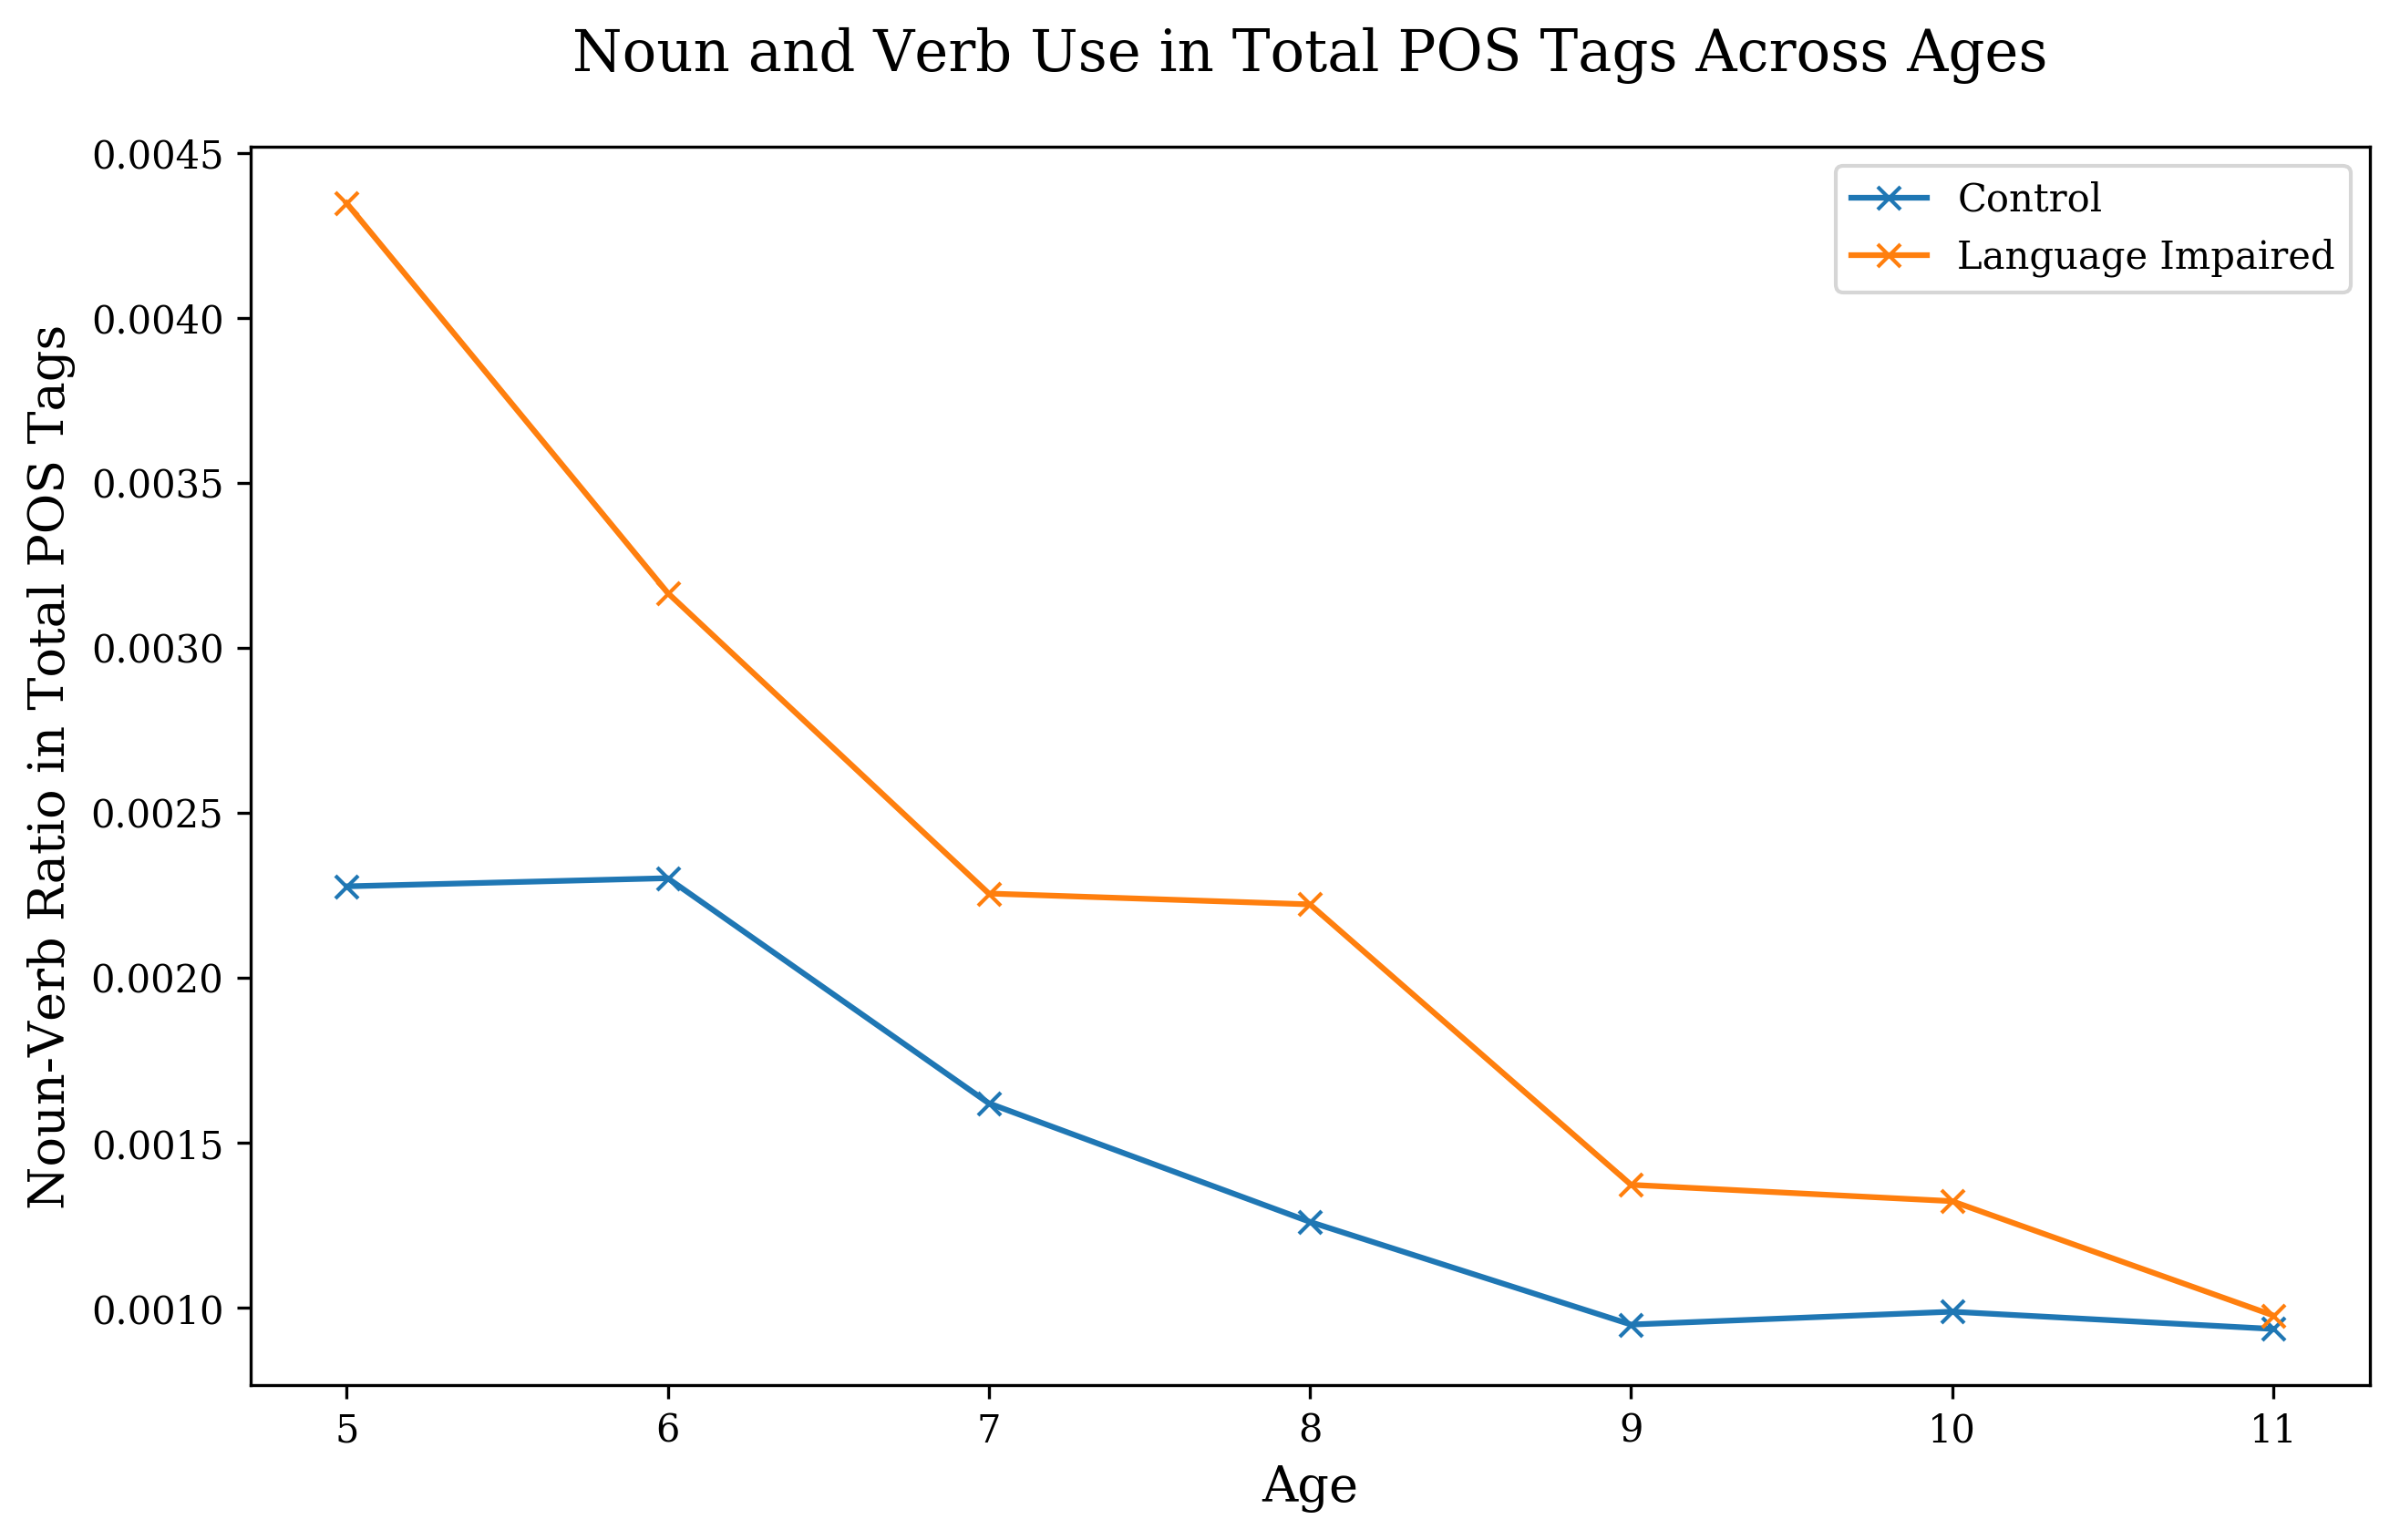

In [141]:
Impaired_NVtoTol_df = Impaired.groupby("Age")["NVtoTot"].mean()
Normal_NVtoTol_df = Normal.groupby("Age")["NVtoTot"].mean()

plt.figure(figsize = (10,6), dpi = 300)
plt.plot(list(Normal_NVtoTol_df.keys()), list(Normal_NVtoTol_df), marker = "x", label = "Control")
plt.plot(list(Impaired_NVtoTol_df.keys()), list(Impaired_NVtoTol_df), marker = "x", label = "Language Impaired")
plt.legend(loc = 'best')
plt.xlabel("Age", fontsize = 13)
plt.ylabel("Noun-Verb Ratio in Total POS Tags", fontsize = 13)
plt.title("Noun and Verb Use in Total POS Tags Across Ages", fontsize = 15)


* Children use a smaller proportion of nouns and verbs as they grow up. 
* There is a significant difference in proportion of nouns and verbs between children with typical and impaired language abilities. 
* The difference tend to converge as both groups grow up, possibly due to the fact that impaired kids are just slow in learning. 

In [73]:
# Model summary
nvratio_lm = ols('Age ~ NVtoTot', data=Impaired).fit()
table = sm.stats.anova_lm(nvratio_lm, typ=2) # Type 2 ANOVA DataFrame
print(nvratio_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     39.62
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           2.57e-09
Time:                        15:50:51   Log-Likelihood:                -284.35
No. Observations:                 171   AIC:                             572.7
Df Residuals:                     169   BIC:                             579.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4280      0.168     50.290      0.0

In [74]:
# Model summary
nvratio_lm = ols('Age ~ NVtoTot', data=Normal).fit()
table = sm.stats.anova_lm(nvratio_lm, typ=2) # Type 2 ANOVA DataFrame
print(nvratio_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     74.67
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           7.73e-17
Time:                        15:50:56   Log-Likelihood:                -962.56
No. Observations:                 497   AIC:                             1929.
Df Residuals:                     495   BIC:                             1938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4472      0.114     73.963      0.0

* Marginal significance for normal: fewer nouns as growing older.

# Analysis 2 - All POS Frequencies

In [7]:
# Create a dictionary of all POS frequencies 
pos_freq = {key : {pos : None 
                   for pos in pos_vocab
            } for key in pos_dict_df.keys()}

for idx in pos_dict_df:
    dic = pos_dict_df[idx]
    values = dic.values()
    total_freq = sum(values)
    for pos in pos_vocab:
        pos_freq[idx][pos] = float(dic[pos])/float(total_freq)
    
pos_df = pd.DataFrame(pos_freq).T
gil_info = gil_info.sort_values(by = ["transcript_id"])
pos_df.reset_index(drop=True, inplace=True)
gil_info.reset_index(drop=True, inplace=True)
pos_data = pd.concat([gil_info,pos_df], axis = 1)

pos_data

,Unnamed: 0,transcript_id,date,Impaired,Age,Gender,Gloss,POS,adj,adv,...,pro:indef,pro:int,pro:obj,pro:per,pro:poss,pro:refl,pro:rel,pro:sub,qn,v
0,0,9573,1/28/2002,1,10,f,"[and she asked um where do you wanna go, and t...","[coord pro:sub v adv:int mod pro:per v v, coor...",0.023810,0.029762,...,0.005952,0.005952,0.011905,0.011905,0.0,0.000000,0.011905,0.101190,0.023810,0.154762
1,1,9574,12/2/2002,1,10,f,"[um they were hungry, um mom says where do you...","[pro:sub cop adj, n v adv:int mod pro:per v in...",0.053892,0.053892,...,0.000000,0.000000,0.005988,0.005988,0.0,0.000000,0.005988,0.053892,0.011976,0.101796
2,2,9575,11/14/2002,1,10,f,[Lisa and Raymond and their mother were suppos...,[n:prop coord n:prop coord det:poss n aux part...,0.032258,0.032258,...,0.008065,0.000000,0.000000,0.008065,0.0,0.000000,0.008065,0.064516,0.008065,0.161290
3,3,9576,12/3/2002,1,10,f,"[their mom said we'll go to Mcdonalds, and the...","[det:poss n v pro:sub v prep n:prop, coord pro...",0.052288,0.045752,...,0.000000,0.013072,0.000000,0.006536,0.0,0.000000,0.006536,0.071895,0.006536,0.143791
4,4,9577,11/5/2002,1,10,f,"[um the boy and the girl ordered um, they went...","[det:art n coord det:art n v, pro:sub v prep n...",0.035599,0.038835,...,0.006472,0.003236,0.012945,0.006472,0.0,0.000000,0.000000,0.090615,0.000000,0.135922
5,5,9578,12/2/2002,1,10,f,[Molly s couldn't make up her mind w with what...,[n:prop mod v prep det:poss n prep pro:int pro...,0.023256,0.065116,...,0.000000,0.000000,0.004651,0.013953,0.0,0.000000,0.004651,0.102326,0.000000,0.153488
6,6,9579,11/12/2002,1,10,f,[when when they both got back from home their ...,[conj pro:sub post v adv prep n det:poss n v p...,0.024194,0.052419,...,0.004032,0.004032,0.012097,0.012097,0.0,0.000000,0.000000,0.068548,0.020161,0.133065
7,7,9580,11/1/2002,1,10,f,[the girl wa Lisa wanted a happymeal a ice+cre...,"[n:prop v det:art det:art n, coord det:art n p...",0.019704,0.039409,...,0.000000,0.000000,0.000000,0.024631,0.0,0.000000,0.004926,0.064039,0.004926,0.157635
8,8,9581,3/20/2002,1,10,m,[alright xxx have to alright when the kids got...,"[conj det:art n v adv det:art n v co v, pro:su...",0.026316,0.031579,...,0.005263,0.000000,0.000000,0.010526,0.0,0.000000,0.000000,0.136842,0.000000,0.142105
9,9,9582,4/12/2002,1,10,m,[hm I guess it was one tuesday I guess that's ...,[co pro:sub v pro:per cop det:num n pro:sub n ...,0.000000,0.071823,...,0.000000,0.000000,0.011050,0.033149,0.0,0.000000,0.000000,0.110497,0.005525,0.160221


In [119]:
import statsmodels.api as sm

X = pos_data[list(pos_data.columns)[8:]] 
Y = pos_data['Age']
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     7.630
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           7.20e-34
Time:                        17:10:43   Log-Likelihood:                -1171.5
No. Observations:                 668   AIC:                             2427.
Df Residuals:                     626   BIC:                             2616.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2058      6.483      2.346      0.0

## Age~All POS Frequencies - Separately analyze LanguageImpair


In [120]:
Impaired_pos = pos_data[pos_data["Impaired"]==1]
Normal_pos = pos_data[pos_data["Impaired"]==0]

In [123]:
X = Impaired_pos[["pro:int", "pro:rel"]] 
Y = Impaired_pos['Age']
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     10.02
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           7.73e-05
Time:                        17:14:42   Log-Likelihood:                -292.72
No. Observations:                 171   AIC:                             591.4
Df Residuals:                     168   BIC:                             600.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0781      0.151     46.728      0.0

In [124]:
X = Normal_pos[["pro:int", "pro:rel"]] 
Y = Normal_pos['Age']
 
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     39.63
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           1.09e-16
Time:                        17:14:58   Log-Likelihood:                -960.49
No. Observations:                 497   AIC:                             1927.
Df Residuals:                     494   BIC:                             1940.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7107      0.135     49.688      0.0

Text(0.5,1,'Iterrogative and Relative Pronoun Use Across Ages')

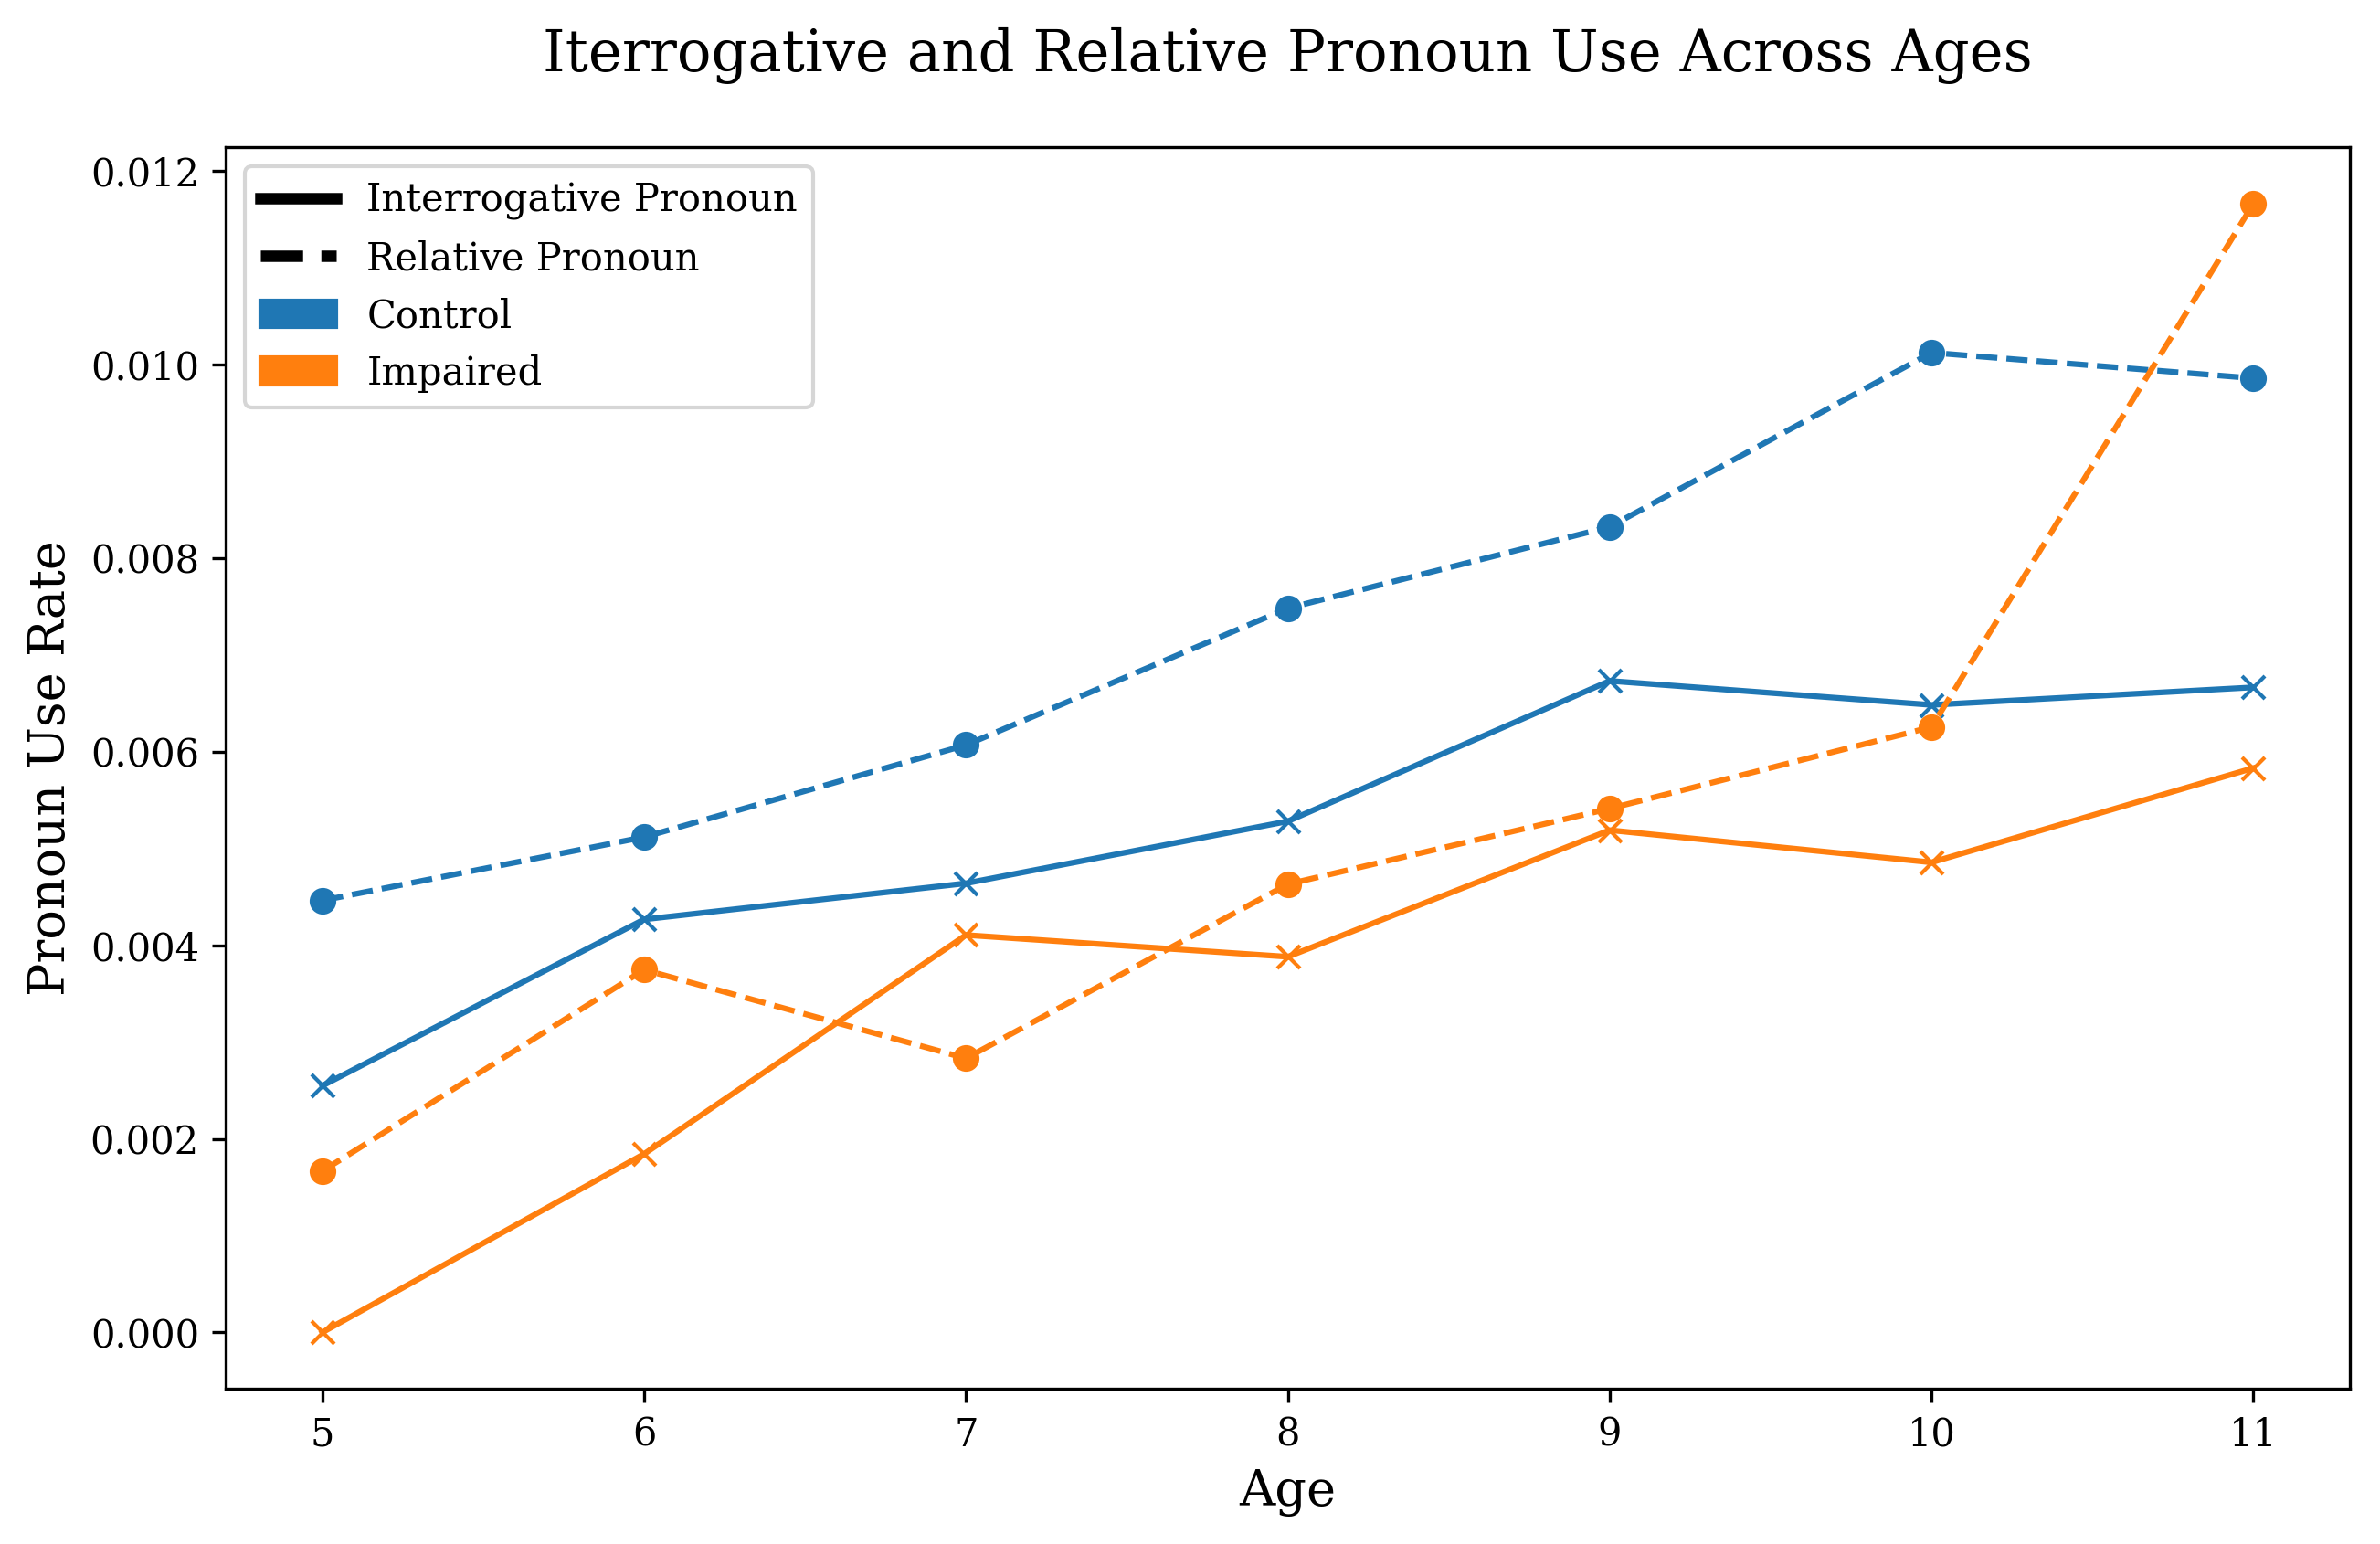

In [139]:
Impaired_proint_df = Impaired_pos.groupby("Age")["pro:int"].mean()
Normal_proint_df = Normal_pos.groupby("Age")["pro:int"].mean()
Impaired_prorel_df = Impaired_pos.groupby("Age")["pro:rel"].mean()
Normal_prorel_df = Normal_pos.groupby("Age")["pro:rel"].mean()

plt.figure(figsize = (10,6), dpi = 300)
plt.plot(list(Normal_proint_df.keys()), list(Normal_proint_df), color = 'C0', marker = "x")
plt.plot(list(Impaired_proint_df.keys()), list(Impaired_proint_df), color = 'C1',marker = "x")
plt.plot(list(Normal_prorel_df.keys()), list(Normal_prorel_df), color = 'C0', marker = "o", linestyle = '--')
plt.plot(list(Impaired_prorel_df.keys()), list(Impaired_prorel_df), color = 'C1',marker = "o", linestyle = '--')

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='black', linewidth=3, linestyle='-', label = 'Interrogative Pronoun'), 
                   Line2D([0], [0], color='black', linewidth=3, linestyle='dashed', label = 'Relative Pronoun'), 
                   mpatches.Patch(color='C0', label='Control'),
                   mpatches.Patch(color='C1', label='Impaired')]
                   
plt.legend(handles=legend_elements)

plt.xlabel("Age", fontsize = 13)
plt.ylabel("Pronoun Use Rate", fontsize = 13)
plt.title("Iterrogative and Relative Pronoun Use Across Ages", fontsize = 15)


* More use of interrogative and relative pronouns suggests that children produce more complex clauses as they grow up. 
